# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import statistics as st

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
# Delay for page load
browser.is_element_present_by_css('div.list_text', wait_time=1)


False

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
temp_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
# Reference temperature data section
temp_data_section = temp_soup.find('div', class_='container-fluid')
# Reference temperature data points
temp_data_points = temp_data_section.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_temp_list = []

# Loop through the scraped data to create a list of rows
for row in temp_data_points[0:]:
    table_data = row.find_all('td')
    temp_dict = {
        'id': table_data[0].text,
        'terrestrial_date': table_data[1].text,
        'sol': table_data[2].text,
        'ls': table_data[3].text,
        'month': table_data[4].text,
        'min_temp': table_data[5].text,
        'pressure': table_data[6].text
    }

    # Append table data row to list
    mars_temp_list.append(temp_dict)
    

In [8]:
mars_temp_list

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_temp_list)

In [10]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
final_df = df.astype(
{
        'id': int,
        'sol': int,
        'ls': int,
        'month': int,
        'min_temp': float,
        'pressure': float
    })

final_df['terrestrial_date'] = pd.to_datetime(final_df['terrestrial_date'])

In [13]:
# Confirm type changes were successful by examining data types again
final_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [14]:
final_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?

# Determine unqiue month values for Mars
martian_months =  final_df['month'].unique()

# Print result
f'The number of months on Mars is {len(martian_months)}.'

'The number of months on Mars is 12.'

In [16]:
# 2. How many Martian days' worth of data are there?

# Determine the number of data points in in set, conditional to 'sol' value being unique.
# If 'sol' value is not unique then this signifies that more than one data point was collected on same martian day.
martian_days_data = final_df['sol'].unique()
f'The number of  Martian days worth of data is {len(martian_days_data)}.'

'The number of  Martian days worth of data is 1867.'

In [21]:
# 3. What is the average low temperature by month?

# Group dataframe by month, outputting the average, or mean, of the data
grouped_df = final_df.groupby(by='month').mean()

# Display output of average low temperature by month
temp_grouped_df = grouped_df['min_temp']
temp_grouped_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

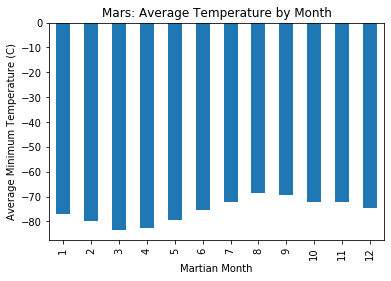

In [52]:
# Plot the average temperature by month
temp_grouped_df.plot.bar(x= 'month', y= 'min_temp')
plt.xlabel("Martian Month")
plt.ylabel("Average Minimum Temperature (C)")
plt.title("Mars: Average Temperature by Month")

plt.show()

In [40]:
# Identify the coldest and hottest months in Curiosity's location
hottest_month = max(temp_grouped_df)
coldest_month = min(temp_grouped_df)

# Display results
f'The coldest month identified by Curiosity is month {coldest_month}, whilst the hottest is month {hottest_month}.'

'The coldest month identified by Curiosity is month -83.30729166666667, whilst the hottest is month -68.38297872340425.'

In [42]:
# 4. Average pressure by Martian month

# Display output of average low temperature by month
psi_grouped_df = grouped_df['pressure']
psi_grouped_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [51]:
# Identify the lowest and highest atmospheric pressure on Mars.
max_psi = max(psi_grouped_df)
min_psi = min(psi_grouped_df)

# Display results
f'The lowest average monthly atmospheric pressure on Mars is {min_psi}, whilst the highest is {max_psi}.'

'The lowest average monthly atmospheric pressure on Mars is 745.0544217687075, whilst the highest is 913.3059701492538.'

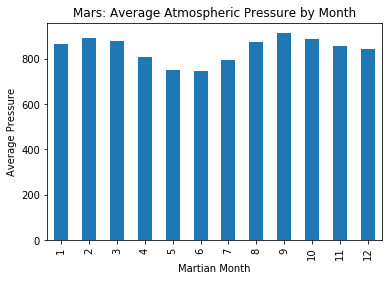

In [54]:
# Plot the average pressure by month
psi_grouped_df.plot.bar(x= 'month', y= 'pressure')
plt.xlabel("Martian Month")
plt.ylabel("Average Pressure")
plt.title("Mars: Average Atmospheric Pressure by Month")

plt.show()

In [55]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Determine the terrestrial dates when the solar longitude of mars is = 0
martian_year_list = final_df.loc[final_df['ls'] == 0, 'terrestrial_date'].tolist()
martian_year_list


[Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-08-02 00:00:00'),
 Timestamp('2015-06-19 00:00:00'),
 Timestamp('2015-06-20 00:00:00'),
 Timestamp('2017-05-06 00:00:00'),
 Timestamp('2017-05-07 00:00:00')]

In [56]:
# Use indexing to determine terrestrial dates representing martian year
ls0_a = martian_year_list[0]
ls0_b = martian_year_list[2]
ls0_c = martian_year_list[4]

# Calculate days between terrestrial dates where mars solar longitude = 0
martian_year_ab = ls0_b - ls0_a
martian_year_bc = ls0_c - ls0_b
print(martian_year_ab.days)
print(martian_year_bc.days)

687
687


In [57]:
# Print result
f'There are {martian_year_ab.days} terrestrial (earth) days are there in a Martian year.'

'There are 687 terrestrial (earth) days are there in a Martian year.'

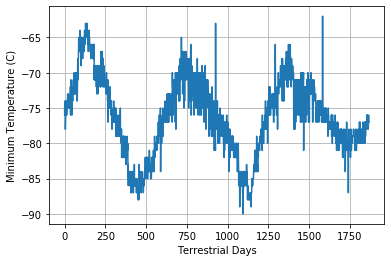

In [58]:
# Visually estimate the number of terrestrial (earth) days are there in 
# a Martian year by plotting the daily minimum temperature.

plt.plot(range(0,len(final_df['id'])), final_df['min_temp'])
plt.grid()
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (C)')

plt.show()

In [59]:
print(
    f'From visual estimate of the above chart, we can see that\n'
    f'annual minimum temperatures occur at approximately 450,\n'
    f'1100 and 1750 terrestrial days. This indicates that a \n'
    f'martian year is approximately 650 terrestiral days.'
)

From visual estimate of the above chart, we can see that
annual minimum temperatures occur at approximately 450,
1100 and 1750 terrestrial days. This indicates that a 
martian year is approximately 650 terrestiral days.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [60]:
# Write the data to a CSV
final_df.to_csv('mars_data.csv')

In [61]:
browser.quit()